**Project Overview**
# **Vehicle Price Prediction**

## **Name :Yuvashree M**
## **Internship ID: UMIP19802**

**Objective**:
 Build a system that can predict the prices for vehicles using data on Vehicle specifications,
 make, etc. Explore the data to understand the features and figure out an approach.


                              name  \
0     2024 Jeep Wagoneer Series II   
1  2024 Jeep Grand Cherokee Laredo   
2         2024 GMC Yukon XL Denali   
3       2023 Dodge Durango Pursuit   
4            2024 RAM 3500 Laramie   

                                         description   make           model  \
0  \n      \n        Heated Leather Seats, Nav Sy...   Jeep        Wagoneer   
1  Al West is committed to offering every custome...   Jeep  Grand Cherokee   
2                                                NaN    GMC        Yukon XL   
3  White Knuckle Clearcoat 2023 Dodge Durango Pur...  Dodge         Durango   
4  \n      \n        2024 Ram 3500 Laramie Billet...    RAM            3500   

   year    price                                             engine  \
0  2024  74600.0                            24V GDI DOHC Twin Turbo   
1  2024  50170.0                                                OHV   
2  2024  96410.0  6.2L V-8 gasoline direct injection, variable v...   
3  2023  468

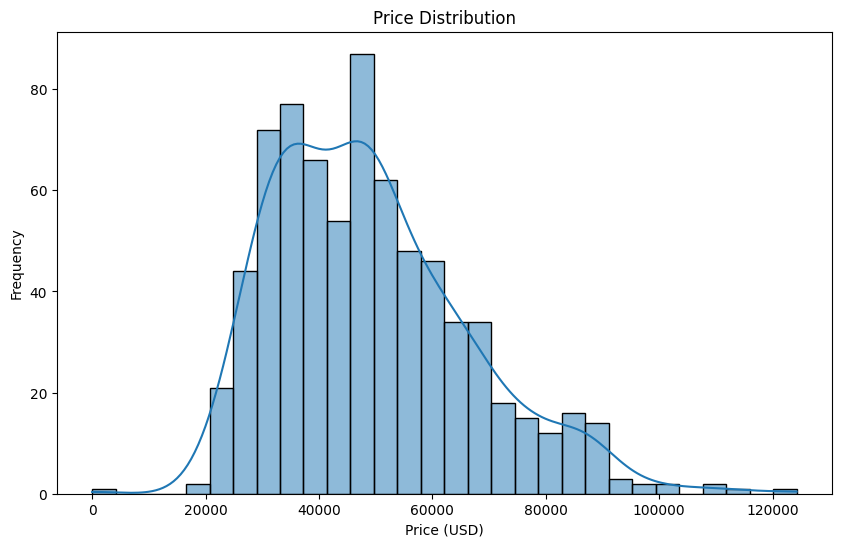

[70395.87       60680.67       35189.2        31035.99
 54130.65       53183.23       47478.69       81548.86
 29732.21       47063.06666667 78130.29       83866.94
 62219.01       48210.62666667 47943.47952381 32308.99749603
 46042.62       52511.372      79397.55       49424.76772619
 37969.28       38337.3125     24201.765      68032.41
 82489.91       79995.62       33705.7844127  52833.434
 81082.86       61223.58       74374.84       42359.21083333
 56521.63333333 77707.78       35556.77       19677.5
 37644.00416667 42997.06833333 44427.97683333 42064.94916667
 31239.62       47803.7925     78751.22       29815.02
 72229.8        47330.65       48511.6        32590.87610317
 67579.11666667 40376.55       25021.34583333 35327.
 58367.54       51464.838      32417.86       37308.53857143
 24686.875      45060.58678571 73539.45666667 31522.5575
 32338.56       75137.48       36784.04833333 47104.55
 35265.54       34354.56       29996.79       55341.43797619
 63855.58666667 80876.5

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv('dataset.csv')  # Replace with your dataset path

# Display the first few rows of the dataset
print(data.head())

# Data Cleaning
# Remove duplicates
data = data.drop_duplicates()

# Check for missing values
print(data.isnull().sum())

# Filling missing values or dropping them
data = data.dropna()  # You can also use imputation techniques

# Exploratory Data Analysis (EDA)
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], bins=30, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()

# Feature Engineering
# Convert categorical features to numerical values
X = data.drop('price', axis=1)
y = data['price']

# Identify categorical and numerical columns
categorical_cols = ['make', 'model', 'fuel', 'transmission', 'body', 'drivetrain', 'exterior_color', 'interior_color']
numerical_cols = ['year', 'cylinders', 'mileage', 'doors']

# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Create a pipeline with preprocessing and model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                             ('regressor', RandomForestRegressor(random_state=42))])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

print(y_pred)



Mean Squared Error: 62724907.40912724
R-squared: 0.8189610721635993


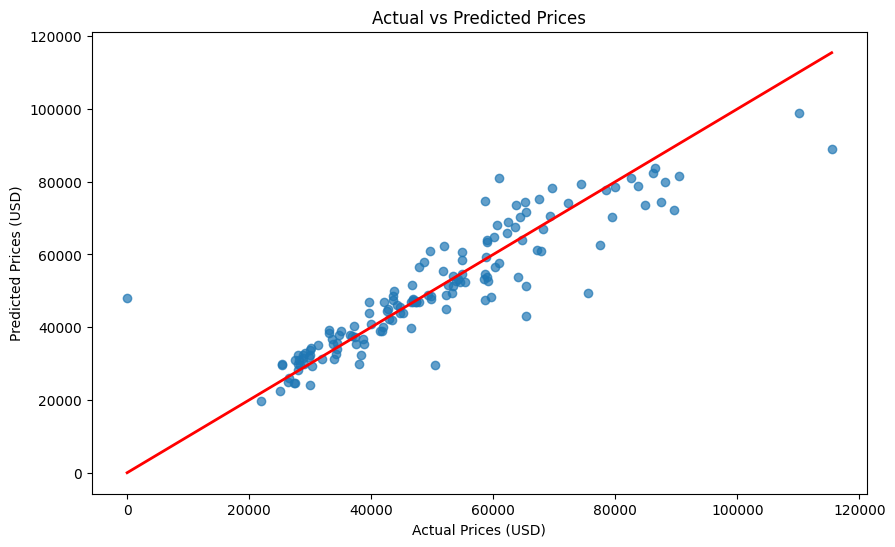

In [42]:
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Plotting predicted vs actual prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices (USD)')
plt.ylabel('Predicted Prices (USD)')
plt.show()